# <font color="darkblue"> Prática 01: Classificação Linear - Regressão Logística </font>

**Objetivos:**


*   Implementar o modelo linear de *Regressão Logística*
*   Comparar seu resultado de classificiação linear com o LRClassifier

**Requisitos de execução:**


*   Upload dos arquivos *random_input.py*, *linearregression.py* e *lrclassifier.py*

**Atividade 1:**

1. Gere $N=100$ pontos aleatórios com rótulos de classificação utilizando a classe RandomInput da Aula 14;

    

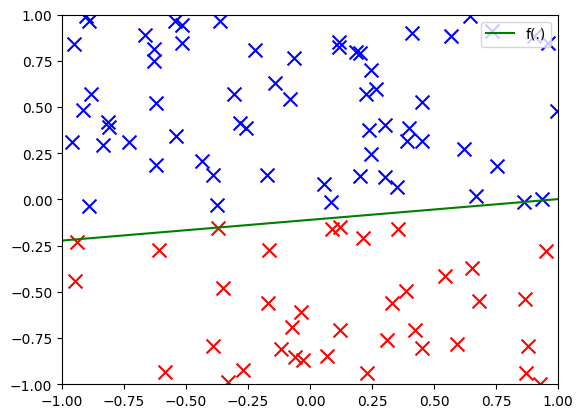

In [1]:
from random_input import RandomInput, draw
    
N = 100
rIN = RandomInput()
_X, _y = rIN.get_linear_input(N)
    
draw(_X, _y, rIN)

**Atividade 2:**

Implemente a *Regressão Logística* com o algoritmo *Gradiente Descendente*:

1. $w(0)=0$; $\eta = 0.1$;
2. **Para** $t=0,1,2..,tmax$ **faça**
3. $\quad\quad g_t=-\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^T(t)x_n}}$;
4. $\quad\quad$ **Se** $(\lVert g_t \rVert < \epsilon)$ : **break**;
5. $\quad\quad w(t+1) = w(t) - \eta g_t$;
6. Retorne $w$


In [14]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample 


# ESSA VERSÃO UTILIZA O BATCH SIZE PARA CALCULAR O GRADIENTE

class LogisticRegression_:
    def __init__(self, eta=0.1, tmax=1000, bs=1000000):
      self.eta = eta
      self.tmax = tmax
      self.batch_size = bs

    # Infere o vetor w da funçao hipotese
    #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self, _X, _y):
        # X está na forma [[1, x1, x2], ...] list padrão do python
        X = np.array(_X)
        y = np.array(_y)

        N = X.shape[0]
        d = X.shape[1]

        # utilizando o batch size
        if self.batch_size > N:
            self.batch_size = N
            
        # Inicializa w com valores aleatórios
        self.w = np.random.rand(d) * 0.1
        for _ in range(self.tmax):
            # Seleciona um batch aleatório
            idx = sample(range(N), self.batch_size)
            X_batch = X[idx]
            y_batch = y[idx]

            # Calcula o gradiente
            gradient = np.zeros(d)
            for i in range(self.batch_size):
                gradient += (self.predict_prob(X_batch[i]) - y_batch[i]) * X_batch[i]
            gradient /= self.batch_size

            # Atualiza w
            self.w -= self.eta * gradient

    def sigmoid(self, z):
        # Limita os valores de z para evitar overflow
        z = np.clip(z, -709, 709)
        return 1 / (1 + np.exp(-z))

    #funcao hipotese inferida pela regressa logistica  
    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.w))
    #Predicao por classificação linear
    def predict(self, X):
        return self.predict_prob(X) > 0.5
    
    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [13]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample 


class LogisticRegression_:
    def __init__(self, eta=0.1, tmax=1000, bs=1000000):
      self.eta = eta
      self.tmax = tmax
      self.batch_size = bs

    # Infere o vetor w da funçao hipotese
    #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self, _X, _y):
        # X está na forma [[1, x1, x2], ...] list padrão do python
        X = np.array(_X)
        y = np.array(_y)

        N = X.shape[0]
        d = X.shape[1]

        # inicializa w com zeros
        self.w = np.zeros(d)

        for t in range(self.tmax):
            # calcula o gradiente de t (todos os pontos)
            grad_t = np.zeros(d)
            for i in range(N): # somatório
                grad_t += (y[i] - self.predict_prob(X[i])) * X[i]

            if LA.norm(grad_t) < 1e-3:
                break

            # atualiza w
            self.w += self.eta * grad_t

    def sigmoid(self, z):
        # Limita os valores de z para evitar overflow
        z = np.clip(z, -709, 709)
        return 1 / (1 + np.exp(-z))

    #funcao hipotese inferida pela regressa logistica  
    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.w))
    #Predicao por classificação linear
    def predict(self, X):
        return self.predict_prob(X) > 0.5
    
    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

**Atividade 3:** 

1. Utilize o algoritmo de *Regressão Logística* para computar a função hipótese $g(x)=\theta(w^Tx)$ inferida sobre os pontos aleatórios gerados;
2. Plote, em um gráfico de dispersão, a probabilidade inferida pelo algoritmo em cada ponto;
3. Utilize a *Regressão Logística* como classificador linear e plote os pontos classificados com bolinha azul(1) e vermelha(0);
4. Compute o erro dentro da amostra gerado pela classificação linear do algoritmo de *Regressão Logistica*.


Error in : 65.0%


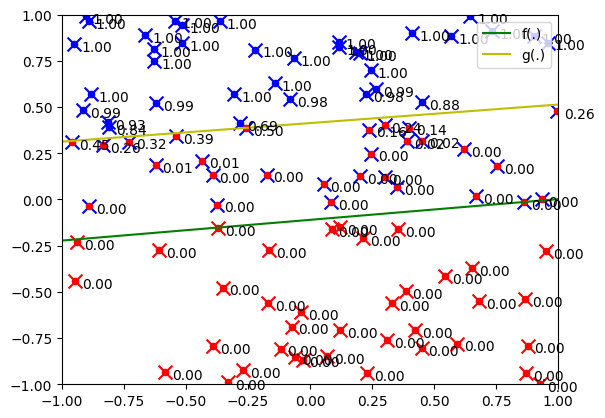

In [15]:
from matplotlib import pyplot as plt

draw(_X, _y, rIN)
rx = [ [1, x[0], x[1]] for x in _X]

#Executar o ajuste dos dados com Regressao Logistica
classifier = LogisticRegression_(0.1, 1000)
classifier.fit(rx, _y)

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_prob(rx)
#print(pred)

for x, pred_x in zip(_X, pred) :
  plt.annotate("{:.2f}".format(pred_x), xy=(x[0], x[1]), xytext=(5,-5), textcoords='offset points')

#desenha a reta inferida pela regressao logistica
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [_X[i][0] for i in range(N) if(pred[i] >= 0.5)]
yP = [_X[i][1] for i in range(N) if(pred[i] >= 0.5)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0.5)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0.5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")


**Atividade 4:**

1. Reproduza o mesmo experimento para o classificador linear com Regressão Linear (*RCClassifier*);
2. Implemente o algoritmo *Gradiente Descendente Estocástico* na classe *LogisticRegression_* e compare os resultados.

Ein = 0.0%


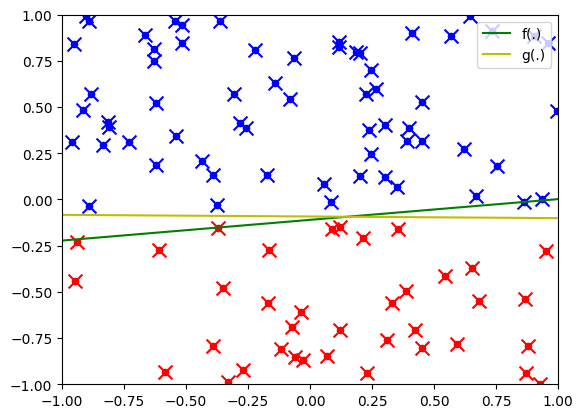

In [4]:
from lrclassifier import LRClassifier

classifier = LRClassifier()
classifier.fit(rx, _y)

draw(_X, _y, rIN)

#desenha a reta inferida pela regressao linear
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
pred = classifier.predict(rx)
xP = [_X[i][0] for i in range(N) if(pred[i] > 0)]
yP = [_X[i][1] for i in range(N) if(pred[i] > 0)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
eIn = 0
for i in range(N):
  if(pred[i] != _y[i]):
    eIn += 1
eIn /= N
print("Ein = " + str(eIn * 100) + "%")

Atividade 5:

1. Reproduza o mesmo experimento com a classe LogisticRegression do pacote *sklearn.linear_model*
        from sklearn.linear_model import LogisticRegression

Error in : 2.0%


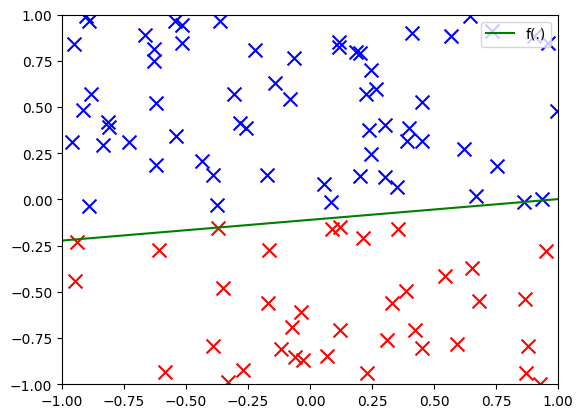

In [6]:
from sklearn.linear_model import LogisticRegression
draw(_X, _y, rIN)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(rx, _y) 

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_proba(rx)
#print(pred)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)
#print(pred)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")
